In [2]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# BigFrames AI Forecast

<table align="left">

  <td>
    <a href="https://colab.research.google.com/github/googleapis/python-bigquery-dataframes/blob/main/notebooks/generative_ai/bq_dataframes_ai_forecast.ipynb">
      <img src="https://raw.githubusercontent.com/googleapis/python-bigquery-dataframes/refs/heads/main/third_party/logo/colab-logo.png" alt="Colab logo"> Run in Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/googleapis/python-bigquery-dataframes/blob/main/notebooks/generative_ai/bq_dataframes_ai_forecast.ipynb">
      <img src="https://raw.githubusercontent.com/googleapis/python-bigquery-dataframes/refs/heads/main/third_party/logo/github-logo.png" width="32" alt="GitHub logo">
      View on GitHub
    </a>
  </td>
  <td>
    <a href="https://console.cloud.google.com/bigquery/import?url=https://github.com/googleapis/python-bigquery-dataframes/blob/main/notebooks/generative_ai/bq_dataframes_ai_forecast.ipynb">
      <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTW1gvOovVlbZAIZylUtf5Iu8-693qS1w5NJw&s" alt="BQ logo" width="35">
      Open in BQ Studio
    </a>
  </td>
</table>


This Notebook introduces forecasting with GenAI Fundation Model with BigFrames AI.

### Setup

In [3]:
PROJECT = "bigframes-dev" # replace with your project

import bigframes.pandas as bpd
bpd.options.bigquery.project = PROJECT
bpd.options.display.progress_bar = None

# Optional, but recommended: partial ordering mode can accelerate executions and save costs.
bpd.options.bigquery.ordering_mode = "partial"

import bigframes.exceptions
import warnings
warnings.filterwarnings("ignore", category=bigframes.exceptions.AmbiguousWindowWarning)

### 1. Create a BigFrames DataFrames from BigQuery public data.

In [4]:
df = bpd.read_gbq("bigquery-public-data.san_francisco_bikeshare.bikeshare_trips")
df

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,...,c_subscription_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_gender,bike_share_for_all_trip,start_station_geom,end_station_geom
0,201802092135083596,788,2018-02-09 21:35:08+00:00,10th Ave at E 15th St,222,2018-02-09 21:48:17+00:00,10th Ave at E 15th St,222,3596,<NA>,...,<NA>,37.792714,-122.24878,37.792714,-122.24878,1984,Male,Yes,POINT (-122.24878 37.79271),POINT (-122.24878 37.79271)
1,201708152357422491,965,2017-08-15 23:57:42+00:00,10th St at Fallon St,201,2017-08-16 00:13:48+00:00,10th Ave at E 15th St,222,2491,<NA>,...,<NA>,37.797673,-122.262997,37.792714,-122.24878,<NA>,<NA>,<NA>,POINT (-122.263 37.79767),POINT (-122.24878 37.79271)
2,201802281657253632,560,2018-02-28 16:57:25+00:00,10th St at Fallon St,201,2018-02-28 17:06:46+00:00,10th Ave at E 15th St,222,3632,<NA>,...,<NA>,37.797673,-122.262997,37.792714,-122.24878,1984,Male,Yes,POINT (-122.263 37.79767),POINT (-122.24878 37.79271)
3,201711170046091337,497,2017-11-17 00:46:09+00:00,10th St at Fallon St,201,2017-11-17 00:54:26+00:00,10th Ave at E 15th St,222,1337,<NA>,...,<NA>,37.797673,-122.262997,37.792714,-122.24878,<NA>,<NA>,<NA>,POINT (-122.263 37.79767),POINT (-122.24878 37.79271)
4,201802201913231257,596,2018-02-20 19:13:23+00:00,10th St at Fallon St,201,2018-02-20 19:23:19+00:00,10th Ave at E 15th St,222,1257,<NA>,...,<NA>,37.797673,-122.262997,37.792714,-122.24878,1984,Male,Yes,POINT (-122.263 37.79767),POINT (-122.24878 37.79271)
5,201708242325001279,1341,2017-08-24 23:25:00+00:00,10th St at Fallon St,201,2017-08-24 23:47:22+00:00,10th Ave at E 15th St,222,1279,<NA>,...,<NA>,37.797673,-122.262997,37.792714,-122.24878,1969,Male,<NA>,POINT (-122.263 37.79767),POINT (-122.24878 37.79271)
6,201801161800473291,489,2018-01-16 18:00:47+00:00,10th St at Fallon St,201,2018-01-16 18:08:56+00:00,10th Ave at E 15th St,222,3291,<NA>,...,<NA>,37.797673,-122.262997,37.792714,-122.24878,1984,Male,Yes,POINT (-122.263 37.79767),POINT (-122.24878 37.79271)
7,20180408155601183,1105,2018-04-08 15:56:01+00:00,13th St at Franklin St,338,2018-04-08 16:14:26+00:00,10th Ave at E 15th St,222,183,<NA>,...,<NA>,37.803189,-122.270579,37.792714,-122.24878,1987,Female,No,POINT (-122.27058 37.80319),POINT (-122.24878 37.79271)
8,201803141857032204,619,2018-03-14 18:57:03+00:00,13th St at Franklin St,338,2018-03-14 19:07:23+00:00,10th Ave at E 15th St,222,2204,<NA>,...,<NA>,37.803189,-122.270579,37.792714,-122.24878,1982,Other,No,POINT (-122.27058 37.80319),POINT (-122.24878 37.79271)
9,201708192053311490,743,2017-08-19 20:53:31+00:00,2nd Ave at E 18th St,200,2017-08-19 21:05:54+00:00,10th Ave at E 15th St,222,1490,<NA>,...,<NA>,37.800214,-122.25381,37.792714,-122.24878,<NA>,<NA>,<NA>,POINT (-122.25381 37.80021),POINT (-122.24878 37.79271)


### 2. Preprocess Data

Only take the start_date after 2018 and the "Subscriber" category as input. start_date are truncated to each hour.

In [5]:
df = df[df["start_date"] >= "2018-01-01"]
df = df[df["subscriber_type"] == "Subscriber"]
df["trip_hour"] = df["start_date"].dt.floor("h")
df = df[["trip_hour", "trip_id"]]

Group and count each hour's num of trips.

In [6]:
df_grouped = df.groupby("trip_hour").count()
df_grouped = df_grouped.reset_index().rename(columns={"trip_id": "num_trips"})
df_grouped

,trip_hour,num_trips
0,2018-01-01 00:00:00+00:00,20
1,2018-01-01 01:00:00+00:00,25
2,2018-01-01 02:00:00+00:00,13
3,2018-01-01 03:00:00+00:00,11
4,2018-01-01 05:00:00+00:00,4
5,2018-01-01 06:00:00+00:00,8
6,2018-01-01 07:00:00+00:00,8
7,2018-01-01 08:00:00+00:00,20
8,2018-01-01 09:00:00+00:00,30
9,2018-01-01 10:00:00+00:00,41


### 3. Make forecastings for next 1 week with DataFrames.ai.forecast API

In [7]:
# Using all the data except the last week (2842-168) for training. And predict the last week (168).
result = df_grouped.head(2842-168).ai.forecast(timestamp_column="trip_hour", data_column="num_trips", horizon=168) 
result

,forecast_timestamp,forecast_value,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,ai_forecast_status
0,2018-04-26 19:00:00+00:00,285.19986,0.95,234.703086,335.696633,
1,2018-04-29 11:00:00+00:00,109.57991,0.95,46.225666,172.934155,
2,2018-04-26 17:00:00+00:00,649.004272,0.95,537.533474,760.475071,
3,2018-04-26 20:00:00+00:00,192.555222,0.95,167.90051,217.209933,
4,2018-04-29 21:00:00+00:00,39.108562,0.95,-33.009109,111.226234,
5,2018-04-25 07:00:00+00:00,358.756592,0.95,276.305603,441.207581,
6,2018-04-27 22:00:00+00:00,103.589096,0.95,94.45235,112.725842,
7,2018-04-28 04:00:00+00:00,10.61972,0.95,13.41772,7.821721,
8,2018-04-28 17:00:00+00:00,150.812927,0.95,135.032989,166.592866,
9,2018-04-24 10:00:00+00:00,221.464111,0.95,154.598621,288.329602,


### 4. Process the raw result and draw a line plot along with the training data

In [8]:
result = result.sort_values("forecast_timestamp")
result = result[["forecast_timestamp", "forecast_value"]]
result = result.rename(columns={"forecast_timestamp": "trip_hour", "forecast_value": "num_trips_forecast"})
df_all = bpd.concat([df_grouped, result])
df_all = df_all.tail(672) # 4 weeks

Plot a line chart and compare with the actual result.

<Axes: xlabel='trip_hour'>

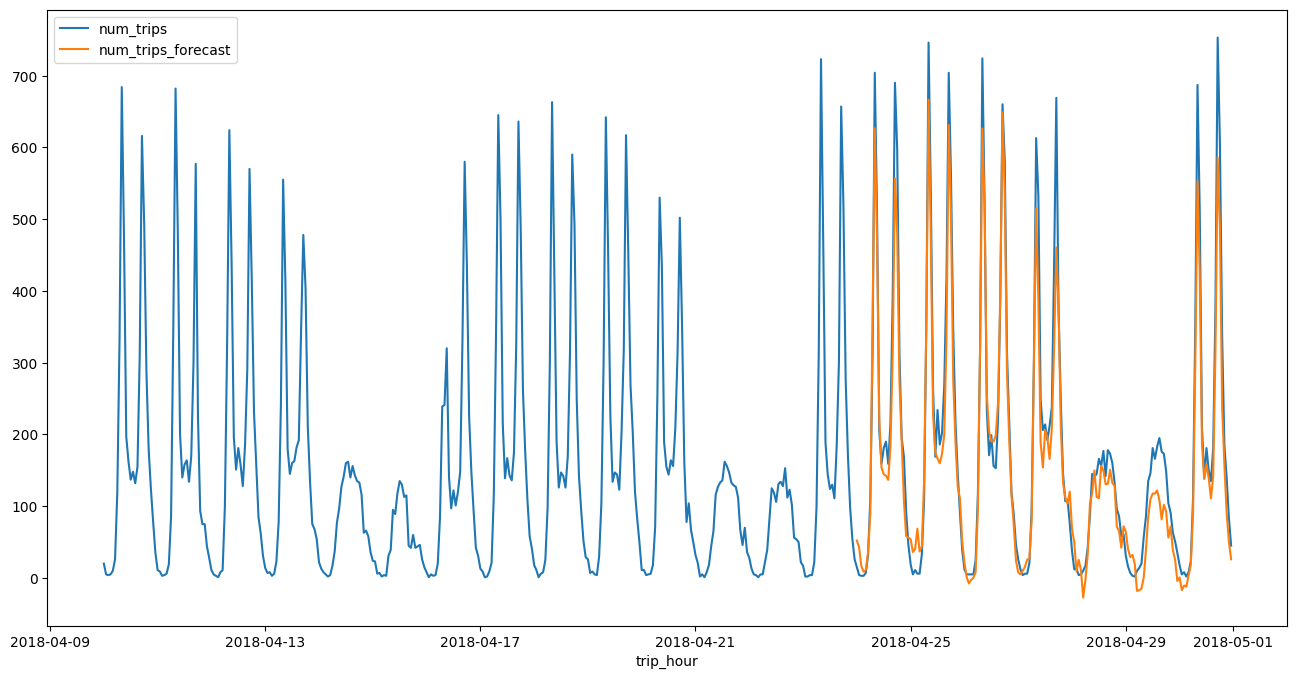

In [9]:
df_all = df_all.set_index("trip_hour")
df_all.plot.line(figsize=(16, 8))